# Fehlerverstärkung und Kondition

## Verstärkungfaktoren oder Konditionszahlen

Auszurechnen sei die Funktion $f(x,y)$. In der Vorlesung haben wir gesehen: Seien $\tilde y$ und $\tilde x$ Näherungen für $y$ und $x$. Dann kann man den relativen Fehler im Ergebnis abschätzen durch die Summe der relativen Fehler in $x$ und $y$, jeweils multipliziert mit den Verstärkungsfaktoren oder Konditionszahlen.

### Multiplikation
Wir setzen $f(x,y)=xy$. Nach Vorlesung gilt für die Verstärkungsfaktoren $M_x$ und $M_y$
$$M_x=\frac \partial {\partial x} f(x,y) \frac x {f(x,y)}=1,\,M_y=\frac \partial {\partial y} f(x,y) \frac y {f(x,y)}=1.$$

Achtung: **Dies ist die vereinfachte Formel für kleine Fehler, eigentlich müsste dort ein Supremum der Ableitung stehen.**

Wir testen dies. Wir denken uns zwei Zahlen aus zwischen 1 und 10, addieren einen zufälligen Fehler und berechnen den relativen Fehler für $f$.

In [2]:
import math
import random
random.seed(1)

def f(x,y):
    return x*y;
Mx=1
My=1

x=random.uniform(1,10)
y=random.uniform(1,10)

dx=random.gauss(0,0.01)
dy=random.gauss(0,0.01)

true_value=f(x,y)
wrong_value=f(x+dx,y+dy)

rel_error=abs((true_value-wrong_value)/true_value)
pred_error=Mx*abs(dx/x)+My*abs(dy/y)

print('relative error=',rel_error)
print('predicted error=',pred_error)

relative error= 0.000586237821701415
predicted error= 0.0011864919189501053


Ok, für diesen einen Fehler hat es geklappt. Der tatsächliche Fehler ist kleiner als der durch die Verstärkungsfaktoren vorhergesagte - klar, dies ist ja nur eine Abschätzung. Wir testen das Gleiche nun mit sehr vielen Fehlern. Falls unsere Bedingung verletzt ist, geben wir "This cannot happen" aus.

In [3]:
for i in range(1,10):
    dx=random.gauss(0,0.01)
    dy=random.gauss(0,0.01)

    true_value=f(x,y)
    wrong_value=f(x+dx,y+dy)

    rel_error=abs((true_value-wrong_value)/true_value)
    pred_error=Mx*abs(dx/x)+My*abs(dy/y)
    
    if (rel_error>pred_error):
        print('This cannot happen.',pred_error,rel_error,rel_error-pred_error)


This cannot happen. 0.001056761899170666 0.001056901375717954 1.394765472880876e-07
This cannot happen. 0.004221029320755138 0.004225049497591531 4.020176836393163e-06
This cannot happen. 0.00581034095385451 0.005811626742085612 1.2857882311020918e-06


Blöd - tatsächlich ist unsere Ungleichung in einigen Fällen (sehr knapp) falsch. Die Begründung ist natürlich: Im Verstärkungsfaktor muss eigentlich noch das Supremum genommen werden. Wir tun das und wiederholen den Versuch.

In [4]:
for i in range(1,10000):
    dx=random.gauss(0,0.01)
    dy=random.gauss(0,0.01)

    true_value=f(x,y)
    wrong_value=f(x+dx,y+dy)

    Mx=abs(x/f(x,y)*max(y,y+dy))
    My=abs(y/f(x,y)*max(x,x+dx))
    rel_error=abs((true_value-wrong_value)/true_value)
    pred_error=Mx*abs(dx/x)+My*abs(dy/y)
    
    if (rel_error>pred_error):
        print('This cannot happen.',pred_error,rel_error)

...und jetzt ist die Ungleichung korrekt. Wir notieren: Eigentlich muss man das Maximum der Ableitung im Intervall $[x,x+dx]$ bzw. $[y,y+dy]$ bilden, aber der Wert an der Stelle $x$ bzw. $y$ ist eine sehr gute Näherung und für unsere Zwecke ausreichend.

## Addition
Wir setzen also $f(x,y)=x+y$.

In [5]:
random.seed(1)

def f(x,y):
    return x+y;
Mx=x/f(x,y)
My=y/f(x,y)

x=random.uniform(1,10)
y=random.uniform(1,10)

dx=random.gauss(0,0.01)
dy=random.gauss(0,0.01)

true_value=f(x,y)
wrong_value=f(x+dx,y+dy)

rel_error=abs((true_value-wrong_value)/true_value)
pred_error=Mx*abs(dx/x)+My*abs(dy/y)

print('relative error=',rel_error)
print('predicted error=',pred_error)

relative error= 0.0006443301275509121
predicted error= 0.0007667640438184843


Das sieht wieder gut aus. Wir machen unseren Test von oben.

In [6]:
for i in range(1,10):
    dx=random.gauss(0,0.01)
    dy=random.gauss(0,0.01)

    true_value=f(x,y)
    wrong_value=f(x+dx,y+dy)

    rel_error=abs((true_value-wrong_value)/true_value)
    pred_error=Mx*abs(dx/x)+My*abs(dy/y)
    
    if (rel_error>pred_error):
        print('This cannot happen.',pred_error,rel_error,rel_error-pred_error,x,y)

This cannot happen. 0.00030701457983872324 0.0003070145798387455 2.2280354644577116e-17 2.209278197011611 8.626903632435095
This cannot happen. 0.0013210819509619136 0.00132108195096212 2.0643209364124004e-16 2.209278197011611 8.626903632435095


Hier bekommen wir wieder zwei Verletzungen unserer Bedingung. Wir sehen aber: Der Unterschied ist gerade $10^{-16}$. Das ist die Maschinengenauigkeit. Unsere Bedingung ist also nicht wirklich verletzt, sondern auf dem Rechner wurde nicht genau genug gerechnet - das ist für uns ok. Wir geben also noch einen Zuschlag von $3 \cdot 10^{-16}$.

In [7]:
for i in range(1,10000):
    dx=random.gauss(0,0.01)
    dy=random.gauss(0,0.01)

    true_value=f(x,y)
    wrong_value=f(x+dx,y+dy)

    rel_error=abs((true_value-wrong_value)/true_value)
    pred_error=Mx*abs(dx/x)+My*abs(dy/y)
    
    if (rel_error>pred_error+3e-16):
        print('This cannot happen.',pred_error,rel_error,rel_error-pred_error,x,y)

...und alles wird wieder korrekt. 

**Bemerkung:** Hier bringt natürlich das Bilden des Maximums nichts, denn die Ableitungen sind konstant.

Bisher haben wir uns bei der Addition den einfachen Fall angeschaut, dass beide Zahlen gleiches Vorzeichen haben. Wir betrachten nun den Fall: Beide Zahlen haben fast denselben Betrag, aber unterschiedliches Vorzeichen (Auslöschung).

In [8]:
x=3
y=-3.001

Mx=x/f(x,y)
My=y/f(x,y)

dx=random.gauss(0,0.01)
dy=random.gauss(0,0.01)

true_value=f(x,y)
wrong_value=f(x+dx,y+dy)

rel_error=abs((true_value-wrong_value)/true_value)
pred_error=Mx*abs(dx/x)+My*abs(dy/y)

print('relative error=',rel_error)
print('predicted error=',pred_error)
print('relative argument error=',abs(dx/x),abs(dy/y))

relative error= 5.883848953420516
predicted error= 5.883848953420517
relative argument error= 0.0015056730063347258 0.003465800723900049


Ok, auch in diesem Fall passiert, was wir erwarten: Der Fehler in den Argumenten liegt bei 3 Promille, aber der Fehler im Ergebnis ist 500%. Auslöschung sorgt für katastrophale Resultate. Man muss sie auf jeden Fall vermeiden.

## Wurzelberechnung
Zum Abschluss ein Beispiel für eine instabile Auswertung. Wir setzen
$$f(x):=\sqrt{1+x^2}-1.$$
Der Verstärkungfaktor ist
$$M=\sup \frac x {\sqrt{1+x^2}} \cdot \frac x {\sqrt{1+x^2}-1}.$$
Diese Funktion ist monoton fallend für $x>0$, $x\in[0,1]$. Ihr Maximum 2 nimmt sie bei $0$ an.

Wir sehen bereits, dass hier Auslöschung droht. Wir verlassen uns also diesmal nicht auf den Rechner. Wir wählen
$$x=\sqrt{h^2+2h}$$
für ein kleines $h$. Dann ist $f(x)=\sqrt{(1+h)^2}-1=h.$ Wir addieren gar keinen Fehler, sondern schauen auf die Auswirkung des Maschinenfehlers eps.

In [9]:
h=1e-12
x=math.sqrt(h*h+2*h)
def f(x):
    return math.sqrt(1+x*x)-1
M=2

eps=math.exp(-53*math.log(2))
print(eps)
true_value=f(x)
wrong_value=h

rel_error=abs((true_value-wrong_value)/true_value)
pred_error=M*eps

print('relative error=',rel_error)
print('predicted error=',pred_error)

1.1102230246251573e-16
relative error= 0.00013316175227535187
predicted error= 2.2204460492503146e-16


Oh. Hier ist der tatsächliche, ausgerechnete Fehler also viel größer als der vorhergesagte. Der Grund ist klar: Für $x$ nah bei $0$, werden zwei fast gleiche Zahlen voneinander abgezogen (die Wurzel und $1$). Auslöschung - das Ergebnis ist schlecht, und der Algorithmus ist instabil.

Wie können wir den Wert der Funktion ohne Auslöschung ausrechnen? Indem wir statt der Wurzel die ersten beiden Terme der Taylorreihe der Wurzel einsetzen. 

In [10]:
def f(x):
    return x*x/2-x*x*x*x/8

true_value=h
wrong_value=f(x)

rel_error=abs((true_value-wrong_value)/true_value)
pred_error=M*eps

print('relative error=',rel_error)
print('predicted error=',pred_error)

relative error= 0.0
predicted error= 2.2204460492503146e-16


Das ist ok - nutzt man also die Taylorreihe, ist der Algorithmus stabil. Hier muss man natürlich noch den zusätzlichen Fehler durch Weglassen fast aller Terme der Taylorreihe berücksichtigen, aber dieser ist schnell beschränkt durch die Restgliedabschätzungen.

Wir wollen nun noch schnell zeigen, dass man mit python auch die Taylorreihe symbolisch berechnen kann. In unserem Jupyter ist sympy nicht installiert, wir installieren es pro User.

In [1]:
!pip install --user sympy
import sympy
import mpmath

Wir definieren unsere Funktion neu und berechnen die Koeffizienten der Taylorreihe symbolisch.

In [12]:
x=sympy.Symbol('x')
F0=sympy.sqrt(1+x*x)-1

fak=1;
F=F0
for i in range(0,8):
    print('Koeffizient ',i,':',F.subs(x,0)/fak)
    fak=fak*(i+1)
    F=sympy.diff(F,x)

Koeffizient  0 : 0
Koeffizient  1 : 0
Koeffizient  2 : 1/2
Koeffizient  3 : 0
Koeffizient  4 : -1/8
Koeffizient  5 : 0
Koeffizient  6 : 1/16
Koeffizient  7 : 0


...also:
$$0+0x+\frac 1 2 x^2 + 0 x^3-\frac 1 8 x^4+\ldots.$$

Auch unseren Verstärkungsfaktor können wir jetzt symbolisch ausrechnen (oben bereits angegeben). Hier muss mit l'Hospital der Grenzwert ausgerechnet werden, das tun wir mit "limit".

In [13]:
F1=sympy.diff(F0,x)
M=F1*x/F0
print(M)
print(sympy.limit(M,x,0))

x**2/(sqrt(x**2 + 1)*(sqrt(x**2 + 1) - 1))
2


## Fehlerverstärkung für Lineare Gleichungssysteme
Es sei $A$ eine invertierbare Matrix. Zu lösen sei das Gleichungssystem $$Ax=b.$$
Für die Matrix $A$ ist nur eine Näherung $A+\Delta A$ bekannt, für $b$ eine Näherung $b+\Delta b$.

Wir lösen also das falsche Gleichungssystem $$(A+\Delta A)\tilde x=b+\Delta b.$$
Wir setzen $\tilde x=x+\Delta x$. Dann ist der relative Fehler im Ergebnis, der uns interessiert, gerade $\frac{||\Delta x||}{||x||}$.

Frage: Können wir diesen Fehler durch die relativen Datenfehler $\frac{||\Delta A||}{||A||}$ und $\frac{||\Delta b||}{||b||}$ abschätzen?

### Einführendes Beispiel

Zunächst betrachten wir aber zwei einfache Beispiele im $R^2$. Gegeben seien
$$A=\begin{pmatrix}
1 & 1\\
1 & a
\end{pmatrix},\, b=\begin{pmatrix}
2\\
1+a
\end{pmatrix}.$$
Offensichtlich ist unabhängig von $a$ $$x=\begin{pmatrix} 1 \\ 1\end{pmatrix}$$ die Lösung von $Ax=b$. Wir betrachten zunächst den Fall $a=-1$.

In [14]:
import numpy as np
a=-1
A=[[1,1],[1,a]]
A1=A
b=[2,1+a]
x=np.linalg.solve(A,b)

Ok, diese Lösung ist korrekt. Wir stören der Einfachheit halber nur die rechte Seite leicht.

In [15]:
Deltab=np.random.normal(0,0.01,[2])
DeltaA=np.random.normal(0,0.01,[2,2])

Wir müssen uns für eine Norm entscheiden. Wir nutzen die 2-Norm und ihre induzierte Matrixnorm. **Achtung:** Zur Berechnung der Matrixnorm muss der größte Eigenwert einer Matrix berechnet werden. Wie das geht, werden wir erst später sehen.

In [16]:
xtilde=np.linalg.solve(A+DeltaA,b+Deltab)
Deltax=xtilde-x

relb=np.linalg.norm(Deltab,2)/np.linalg.norm(b,2)
relA=np.linalg.norm(DeltaA,2)/np.linalg.norm(A,2)
relx=np.linalg.norm(Deltax,2)/np.linalg.norm(x,2)

print("Relativer Fehler in b:",relb)
print("Relativer Fehler in A:",relA)
print("Relativer Fehler in x:",relx)
print("Fehlerverstärkung:",relx/(relb+relA))

Relativer Fehler in b: 0.000443101739195
Relativer Fehler in A: 0.00338414275111
Relativer Fehler in x: 0.00256222500301
Fehlerverstärkung: 0.669469904391


Ok, der Fehler im Ergebnis liegt in der Größenordnung der Eingangsfehler. Das ist akzeptabel.

Jetzt wiederholen wir das Ganze mit $a=1.01$.

In [17]:
a=1.01
A=[[1,1],[1,a]]
A2=A
b=[2,1+a]
x=np.linalg.solve(A,b)
print("Lösung von Ax=b:",x)
xtilde=np.linalg.solve(A+DeltaA,b+Deltab)
Deltax=xtilde-x

relb=np.linalg.norm(Deltab,2)/np.linalg.norm(b,2)
relA=np.linalg.norm(DeltaA,2)/np.linalg.norm(A,2)
relx=np.linalg.norm(Deltax,2)/np.linalg.norm(x,2)

print("Relativer Fehler in b:",relb)
print("Relativer Fehler in A:",relA)
print("Relativer Fehler in x:",relx)
print("Fehlerverstärkung:",relx/(relb+relA))

print("Fehler bei der Erfüllung des Gleichungssystems:",np.dot(A,xtilde)-b)

Lösung von Ax=b: [ 1.  1.]
Relativer Fehler in b: 0.000312537925483
Relativer Fehler in A: 0.00238696794949
Relativer Fehler in x: 1.35413914907
Fehlerverstärkung: 501.624820168
Fehler bei der Erfüllung des Gleichungssystems: [ 0.00406154 -0.00945953]


Ok, jetzt ist der Fehler im Ergebnis plötzlich viel größer.

Wir bemerken schon mal für später: Obwohl der relative Fehler riesengroß ist (fast 100%), wird das Gleichungssystem auch durch diesen falschen Vektor gut gelöst. 

Wir lösen das korrekte System graphisch, hier zunächst für $a=-1$.


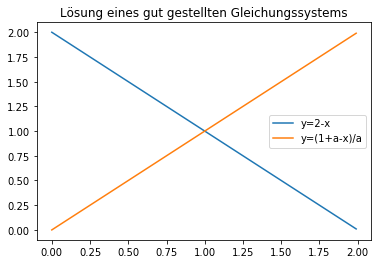

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
N=100
x=np.arange(0,2,0.01)
a=-1
plt.plot(x,2-x,x,(1+a-x)/a)
plt.title("Lösung eines gut gestellten Gleichungssystems")
plt.legend( ["y=2-x","y=(1+a-x)/a"])

Die Lösung ist hier klar auszumachen. Verschiebt man die Vektoren leicht, so ändert sich auch der Schnittpunkt nur wenig.

Jetzt das Gleiche für $a=1.001$.

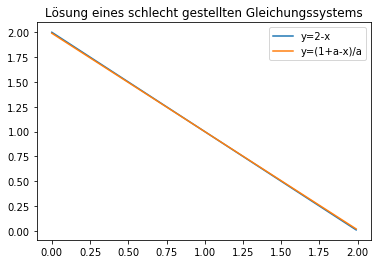

In [19]:
a=1.01
plt.plot(x,2-x,x,(1+a-x)/a)
plt.title("Lösung eines schlecht gestellten Gleichungssystems")
plt.legend( ["y=2-x","y=(1+a-x)/a"])

Ok, hier ist die Lösung nur mit spitzestem Bleistift erkennbar. Klar ist auch: Kleinste Fehler beim Zeichnen führen zur Katastrophe. Offensichtlich gilt: Je paralleler die Geraden sind, die die Lösung bestimmen, desto größer ist die Auswirkung von Fehlern. Wir werden darauf zurückkommen.

### Herleitung der Abschätzung

Wir leiten nun wie in der Vorlesung die Abschätzung her. Offensichtlich gilt
$$ Ax=b, \, (A+\Delta A)(x+\Delta x)=b+\Delta b.$$
Wir ziehen diese beiden Gleichungen voneinander ab und erhalten
$$(A+\Delta A) \Delta x=\Delta b-\Delta A x$$
oder
$$\Delta x=(A+\Delta A)^{-1} (\Delta b-\Delta A x),$$ falls $(A+\Delta A)$ invertierbar ist.

Nach den Vorbemerkungen zur Neumannschen Reihe wissen wir aber, dass $A+\Delta A$ invertierbar ist, falls $$q=||\Delta A||\cdot ||A^{-1}||<1$$ und dann gilt auch noch $$||(A+\Delta A)^{-1}||\leq \frac{||A^{-1}||}{1-q}.$$

Wir setzen ein in unsere Formel für $\Delta x$ und erhalten

$$||\Delta x||\leq \frac {||A^{-1}||}{1-q} (||\Delta b||+||\Delta A||\cdot ||x||).$$

Wir interessieren uns für den relativen Fehler, wir teilen also durch $||x||$ und erweitern rechts noch mit $||A||$.

$$\frac{||\Delta x||}{||x||}\leq \frac {||A^{-1}||\,||A||}{1-q} (\frac{||\Delta b||}{||A||\,||x||}+\frac {||\Delta A||}{||A||}).$$

Da $||A||\,||x||\geq ||Ax||=||b||$, gilt insgesamt

$$\frac{||\Delta x||}{||x||}\leq \frac {||A^{-1}||\,||A||}{1-q} (\frac{||\Delta b||}{||b||}+\frac {||\Delta A||}{||A||}).$$

Hier sieht man klar: Die relativen Fehler in $A$ und $b$ werden mit der Zahl $$M=\frac{||A^{-1}||\,||A||}{1-q}$$ multipliziert, dies liefert eine Abschätzung für den relativen Fehler im Ergebnis. **$M$ ist also genau unser Verstärkungsfaktor!**

Wie schon mehrmals betont, interessiert uns besonders der Fall sehr kleiner Fehler, also $||\Delta A||\sim 0$. In diesem Fall ist $(1-q)$ fast 1, und die Größenordnung von $M$ wird festgelegt durch das Produkt $||A^{-1}||\,||A||$. Daher wird

$$k(A)=||A||\,||A^{-1}||$$

als Kondition von $A$ bezeichnet. Je größer $k(A)$, desto größer sind Auswirkungen relativer Fehler in $A$ und $b$. 

### Erklärung des Beispiels

Wir testen wieder an unseren Testmatrizen.

In [20]:
k1=np.linalg.norm(A1,2)*np.linalg.norm(np.linalg.inv(A1),2)
k2=np.linalg.norm(A2,2)*np.linalg.norm(np.linalg.inv(A2),2)
print("Kondition der ersten Matrix:",k1)
print("Kondition der zweiten Matrix:",k2)

Kondition der ersten Matrix: 1.0
Kondition der zweiten Matrix: 402.007512484


Die Kondition der ersten Matrix ist 1. Dies ist optimal: Der Fehler im Ergebnis ist genau so groß wie der Fehler in den Eingangsdaten.

Die Kondition der zweiten Matrix ist viel größer, wir müssen also erwarten, dass der Fehler im Ergebnis stark anwächst, und genau dies passiert.

Noch zwei kurze Bemerkungen:

1. Wir hatten oben bemerkt, dass sich Gleichungssysteme, bei denen die Geraden fast parallel sind, schlecht lösen lassen. Dies ist jetzt einfach zu erklären: Die Determinante ist ein Maß für die Parallelität, ist sie fast $0$, so sind die Vektoren in der Matrix fast parallel. Andererseits gilt der Determinantensatz
$$A^{-1}=\frac 1 {\det A} A^\#.$$
Ist also die Determinante nah bei $0$, so wird $A^{-1}$ groß und damit auch die Kondition.
2. Man könnte auf die Idee kommen: Um ein graphisches Ergebnis bei exaktem Gleichungssystem zu testen, setzen wir einfach in die Gleichung ein. **Das ist keine gute Idee** - auch bei sehr schlechten Ergebnissen wird das Gleichungssystem fast erfüllt sein, dies hatten wir bereits oben für das Beispiel gezeigt. Tatsächlich ist Einsetzen zur Prüfung der Güte eines Ergebnisses bei linearen Gleichungssystemen **grundsätzlich** keine gute Idee.